In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import pickle

data = []
names = ['model', 'size', 'agents', 'density', 'success', 'step', 'comm']
for filename in os.listdir("./results_v2"):
    success, steps, num_comm, hist, comm_hist = pickle.load(open(f'./results_v2/{filename}', 'rb'))
    match = re.search(r'(\d+)x(\d+)size_(\d+)agents_0.(\d)density_(\d+).pth', filename)
    if match is not None:
        map_x, map_y, agents, density, n = [int(match.group(i)) for i in range(1, 6)]
        for i in range(n):
            data.append(dict(zip(names, ['DCC_my', map_x, int(agents), density/10., success[i], steps[i], num_comm[i]])))
for filename in os.listdir("./results"):
    success, steps, num_comm, hist, comm_hist = pickle.load(open(f'./results/{filename}', 'rb'))
    match = re.search(r'(\d+)x(\d+)size_(\d+)agents_0.(\d)density_(\d+).pth', filename)
    if match is not None:
        map_x, map_y, agents, density, n = [int(match.group(i)) for i in range(1, 6)]
        for i in range(n):
            data.append(dict(zip(names, ['DCC', map_x, int(agents), density/10., success[i], steps[i], num_comm[i]])))
df = pd.DataFrame(data, columns=names)
df_small = df[df['size'] <= 8].reset_index().drop(['index'], axis=1)
df_big = df[df['size'] > 8].reset_index().drop(['index'], axis=1)


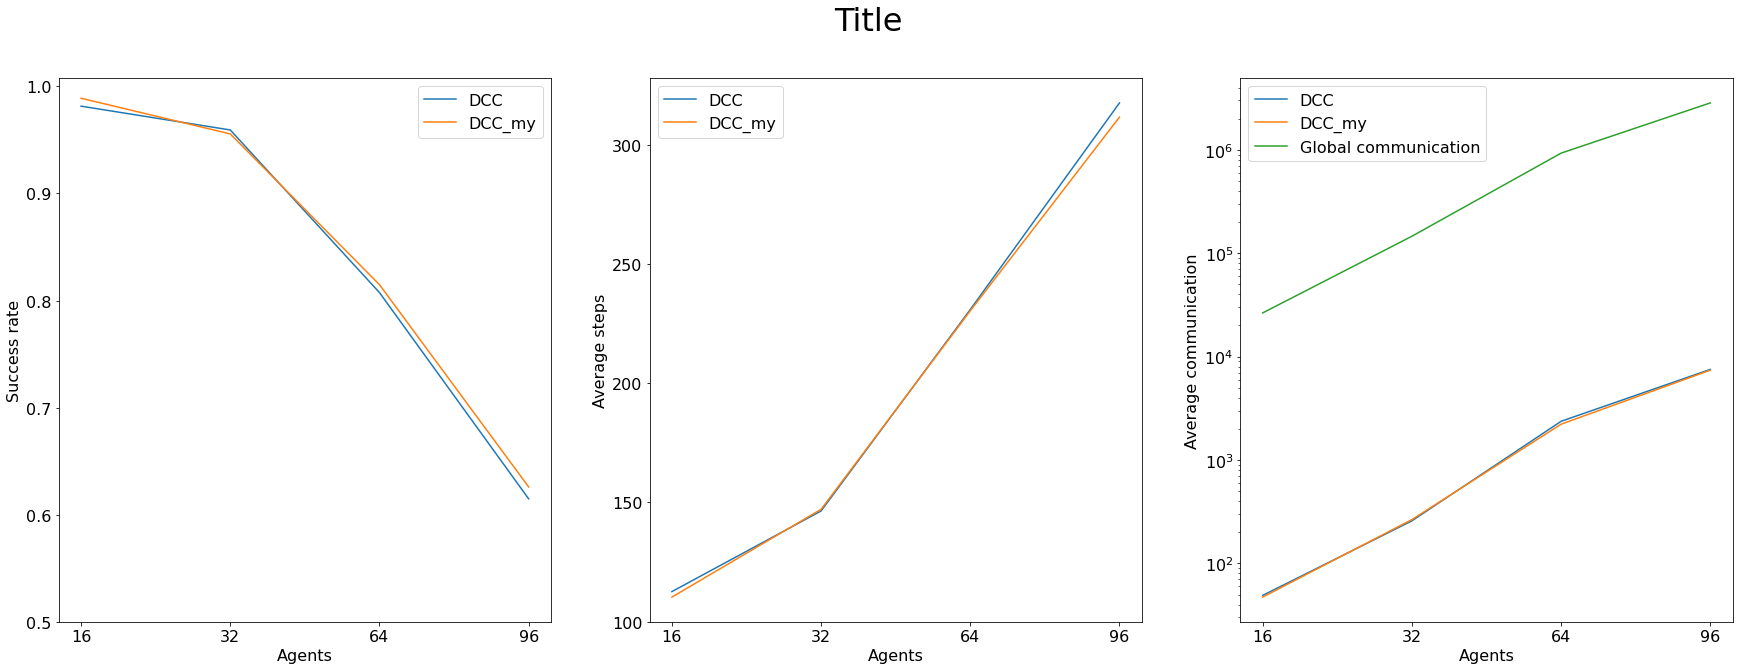

In [57]:
### Plot basically anything ###

# Small tests or big ones
df_to_plot = df_big
# X axis, one of ('agents', 'density', 'size')
x = 'agents'


# # Selected parameters (comment out to avg across all tests)
# size = 96
# density = 0.2
# df_to_plot = df_to_plot[(df_to_plot['size'] == size) & (df_to_plot['density'] == density)]

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharex=True)
fig.set_size_inches((30, 10))
mpl.rc('font', **{'size': 16})


# Title
fig.suptitle('Title', fontsize='32')


models = ['DCC', 'DCC_my']
for model in models:
    df_plt = df_to_plot[df_to_plot['model'] == model].groupby([x]).agg(avg_agents = ('agents', 'mean'), success_rate=('success', 'mean'), avg_step=('step', 'mean'), avg_comm=('comm', 'mean')).reset_index()
    df_plt['agents'] = df_plt['agents'].astype(int)
    ax0.plot(df_plt.index, df_plt['success_rate'], label=model)
    ax1.plot(df_plt.index, df_plt['avg_step'], label=model)
    ax2.plot(df_plt.index, df_plt['avg_comm'], label=model)
    
    if model == models[-1]:
        ax2.plot(df_plt.index, df_plt['avg_agents'] * (df_plt['avg_agents'] - 1) * df_plt['avg_step'], label = 'Global communication')


ax0.set_xticks(np.arange(np.unique(df_to_plot[x]).size), np.unique(df_to_plot[x]))
ax0.set_ylabel('Success rate')
ax1.set_ylabel('Average steps')
ax2.set_ylabel('Average communication')
ax2.set_yscale('log')
ax0.set_yticks(np.linspace(0.5, 1, 6))


for ax in (ax0, ax1, ax2):
    ax.set_xlabel('Agents')
    ax.legend()  
plt.show()

In [56]:
### Some tabular data ###
df[(df['density'] == 0.3) & (df['size'] == 96)].groupby(['agents', 'model']).agg(average_step=('step', 'mean'))

average_step
agents model               
16     DCC       139.166667
       DCC_my    139.066667
32     DCC       166.866667
       DCC_my    167.333333
64     DCC       183.700000
       DCC_my    182.900000
96     DCC       198.433333
       DCC_my    210.000000